### Random Process
Author: Arun Prakash A, arunprakash.ece@kongu.ac.in

 * Random process could be thought of as a collection of indexed random variables (i.e., a vector) that __evolves in time__ .
 * Each RV (element) in a collection (vector) follows a specific distribution.
 * If all RVs in a collection have the same distribution and independent of each other then we call it i.i.d(Independent and Identically distributed). Ex: Bernoulli Process
 * Often, Gaussian distribution for RVs is assumed.
 * __Then what is the difference between observing an outcome of a random variable, which forms a sequence, and a random process?__ 
     <br> The outcome of a random process is a function (of time) where as the outcome of a RV is a number.
 * A set of all possible values of  RVs is called __state space (S)__, and one single observation is __sample function__ or __realization__.
 * If both state space (S) and time (T) is discrete then we call it a **discrete random sequence.** (Ex, Sequence of Coin toss, $X_n,n \geq 1,$ and $S=\{0,1\}$.
 * **Continuous Random sequence** ($S \in \mathbb{R}, T \in \mathbb{Z}$), Ex: Temperature or pressure variation observed in discrete instant of time.
 * **Discrete Random Process** ($S \in \mathbb{Z}, T \in \mathbb{R}$), Ex: Number of packets received over a time intervel
 * **Continuous Random Process** ($S \in \mathbb{R}, T \in \mathbb{R}$), Ex: Temperature or pressure variation observed over an inetrval.
 

In [2]:
import numpy as np
from scipy import signal as sig
from matplotlib import pyplot as plt
plt.style.use('ggplot')

Generate a single **realization** of Bernoulli Process. Produce a  **correlated** process using a simple filter having a difference equation $$ y(n) = 0.5y(n-1)+x(n)$$ or with an equivalent system function representation $$ H(z)=\frac{1}{1-0.5z^{-1}}$$

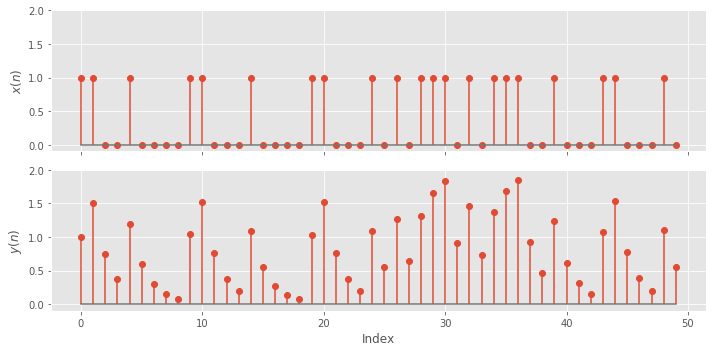

In [5]:
xn = np.random.randint(0,2,(1,50))
b = np.array([1])
a = np.array([1,-0.5])
yn = sig.lfilter(b,a,xn)
fig,ax = plt.subplots(2,1,figsize=(10,5),sharex=True)
ax[0].stem(xn[0],use_line_collection=True)
ax[1].stem(yn[0],use_line_collection=True)
ax[1].set_xlabel('Index')
ax[1].set_ylabel(r'$y(n)$')
ax[0].set_ylabel(r'$x(n)$')
ax[0].set_ylim([-0.1,2])
ax[1].set_ylim([-0.1,2])
fig.tight_layout()

In [6]:
print('The variance of the process xn is: ',np.cov(xn) )
print('The variance of the process yn is: ',np.cov(yn) )

The variance of the process xn is:  0.24857142857142858
The variance of the process yn is:  0.2681514506288874


### Ensemble Average 

 * If we have N realizations of a RP, then ensemble mean at an instant $n$ is an average obtained by summing acrosss all the realization.
 $$ m_x(n) =  E\{x(n)\}$$
 * Similarly ensemble variance could be calculated for each instant of $n$ as follows $$ \sigma^2_x(n)=E\{(x(n)-m_x(n))^2\}$$

In [170]:
m = 100 # no.of realizations
N = 50 
xn = np.random.randint(0,2,(N,m))
m_xn = np.mean(xn,axis=1)
sig_xn = np.var(xn,axis=1)

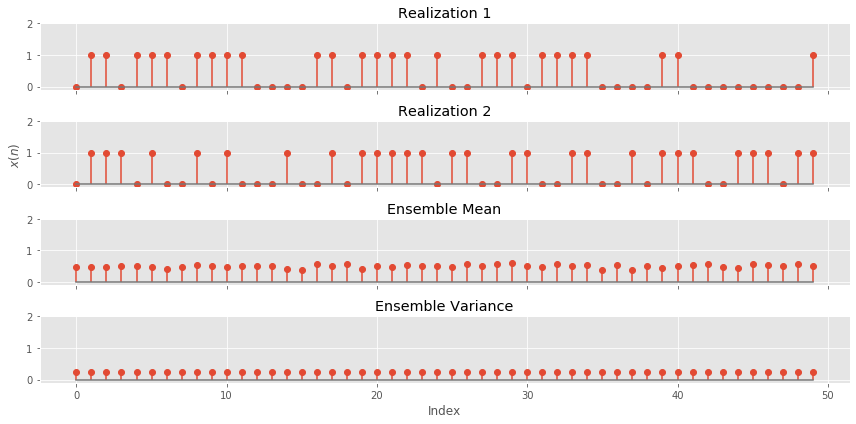

In [171]:
fig,ax = plt.subplots(4,1,figsize=(12,6),sharex=True)
ax[0].stem(xn[:,0],use_line_collection=True)
ax[1].stem(xn[:,1],use_line_collection=True)
ax[2].stem(m_xn,use_line_collection=True)
ax[3].stem(sig_xn,use_line_collection=True)
ax[1].set_ylabel(r'$x(n)$')
ax[0].set_title('Realization 1')
ax[1].set_title('Realization 2')
ax[2].set_title('Ensemble Mean')
ax[3].set_title('Ensemble Variance')
ax[3].set_xlabel('Index')
ax[0].set_ylim([-0.1,2])
ax[1].set_ylim([-0.1,2])
ax[2].set_ylim([-0.1,2])
ax[3].set_ylim([-0.1,2])
fig.tight_layout()

### Auto-Covariance

 * Often, Knowing the functional representation of the process helps us to calculate the covariance of the process (Say, Harmonic process).
 
 * Since a RP is a collection of RVs, we could calculate the covariance betwenn random variables exactly as we did for two RVs.
 
 * If  sample realizations are stacked as a row in a matrix,then $n^{th}$ column represents a distribution of RV at instant $n$
 
 * $C_x(k,l) = E\{ (x(k)-m_x(k))(x(l)-m_x(l)) \} = \frac{1}{M} \sum \limits_{m=0}^{M-1} (x(k)-m_x(k))(x(l)-m_x(l)) $
 
 * $\therefore, C_x(k,l)$ forms a Matrix of size $N \times N$, where $N-1$ is the length of $x_i(n)$.Ofcourse, it will be symmetric.
 
 * In the above case, we have two($M=2$) realizations with $N = 50 $.Therefore, $C_x(k,l)$ will be of size $50 \times 50$.
 
 * Remember that,  we have $M$ realizations of a RP with $N$ RVs. Therefore, $xn$ is of size $N \times M$. 
 
 * Let us manually write a code to compute the covariance and then verify the result with the Numpy function np.cov **(Be careful on whether to compute sample covariance or population cov when using np.cov)**


In [172]:
# For the sequence above, k=0 , l=0 to 49
k=0
cov_0l = []
for l in range(len(xn[:,0])):
    cov_0l.append(np.sum((xn[k,:]-m_xn[k])*(xn[l,:]-m_xn[l]))/100) # subtract mean across observations of each rv
    
print(cov_0l)

[0.24839999999999995, 0.008399999999999989, 0.03379999999999999, 0.04, -0.01, -0.010799999999999992, -0.018600000000000012, -0.010799999999999997, -0.003799999999999989, -0.014600000000000016, -0.02160000000000002, -0.02539999999999999, 0.05, 0.0007999999999999941, 0.051399999999999994, -0.009399999999999993, -0.0222, 0.07000000000000002, 0.012399999999999998, 0.0013999999999999972, -0.004600000000000017, -0.0007999999999999962, -0.008399999999999994, -0.009200000000000012, -0.009200000000000014, -0.0016000000000000142, -0.026800000000000004, 0.02079999999999998, 0.002399999999999997, -0.0006000000000000033, 0.004600000000000017, 0.02379999999999999, -0.007600000000000003, -0.029200000000000014, 0.0316, 0.05980000000000001, -0.018399999999999996, 0.019800000000000005, -0.039200000000000006, 0.013000000000000003, -0.015399999999999976, -0.008399999999999993, 0.003199999999999998, -0.010799999999999992, -0.022400000000000007, -0.016800000000000002, 0.036200000000000024, 0.044600000000000

In [173]:
Cov_xn = np.cov(xn)
print('For k=0,l=0 to 49 (i.e., first row of Cov_xn):\n \n',Cov_xn[:,0])

For k=0,l=0 to 49 (i.e., first row of Cov_xn):
 
 [ 0.25090909  0.00848485  0.03414141  0.04040404 -0.01010101 -0.01090909
 -0.01878788 -0.01090909 -0.00383838 -0.01474747 -0.02181818 -0.02565657
  0.05050505  0.00080808  0.05191919 -0.00949495 -0.02242424  0.07070707
  0.01252525  0.00141414 -0.00464646 -0.00080808 -0.00848485 -0.00929293
 -0.00929293 -0.00161616 -0.02707071  0.0210101   0.00242424 -0.00060606
  0.00464646  0.0240404  -0.00767677 -0.02949495  0.03191919  0.06040404
 -0.01858586  0.02       -0.03959596  0.01313131 -0.01555556 -0.00848485
  0.00323232 -0.01090909 -0.02262626 -0.0169697   0.03656566  0.04505051
  0.02262626  0.01090909]


In [174]:
print('Difference between cov_0l-Cov_xn[0,:] is: \n \n', np.abs(Cov_xn[0,:]-cov_0l))

Difference between cov_0l-Cov_xn[0,:] is: 
 
 [2.50909091e-03 8.48484848e-05 3.41414141e-04 4.04040404e-04
 1.01010101e-04 1.09090909e-04 1.87878788e-04 1.09090909e-04
 3.83838384e-05 1.47474747e-04 2.18181818e-04 2.56565657e-04
 5.05050505e-04 8.08080808e-06 5.19191919e-04 9.49494949e-05
 2.24242424e-04 7.07070707e-04 1.25252525e-04 1.41414141e-05
 4.64646465e-05 8.08080808e-06 8.48484848e-05 9.29292929e-05
 9.29292929e-05 1.61616162e-05 2.70707071e-04 2.10101010e-04
 2.42424242e-05 6.06060606e-06 4.64646465e-05 2.40404040e-04
 7.67676768e-05 2.94949495e-04 3.19191919e-04 6.04040404e-04
 1.85858586e-04 2.00000000e-04 3.95959596e-04 1.31313131e-04
 1.55555556e-04 8.48484848e-05 3.23232323e-05 1.09090909e-04
 2.26262626e-04 1.69696970e-04 3.65656566e-04 4.50505051e-04
 2.26262626e-04 1.09090909e-04]


Visualization

 * Since Covariance forms a matrix, viewing it as an image would reveal the details such as symmetry

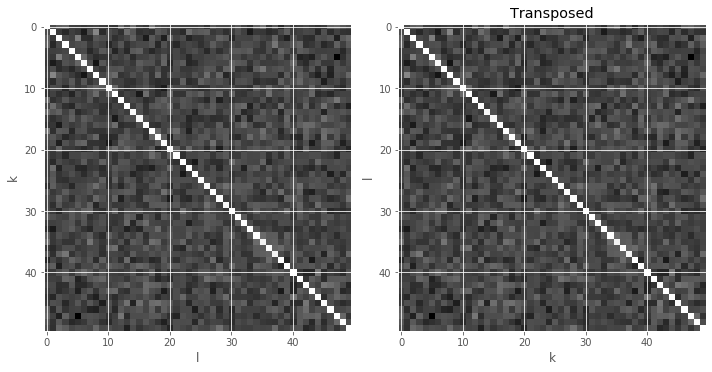

In [175]:
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(Cov_xn,cmap='gray')
ax[0].set_xlabel('l')
ax[0].set_ylabel('k')
ax[1].imshow(Cov_xn.transpose(),cmap='gray')
ax[1].set_xlabel('k')
ax[1].set_ylabel('l')
ax[1].set_title('Transposed')
fig.tight_layout()



**Gausiann Process**

In [176]:
m = 100
N = 50
xn = np.random.normal(loc=0,scale=1,size=(N,m)) # mean=0, covariance = correlation
Cov_xn = np.cov(xn)

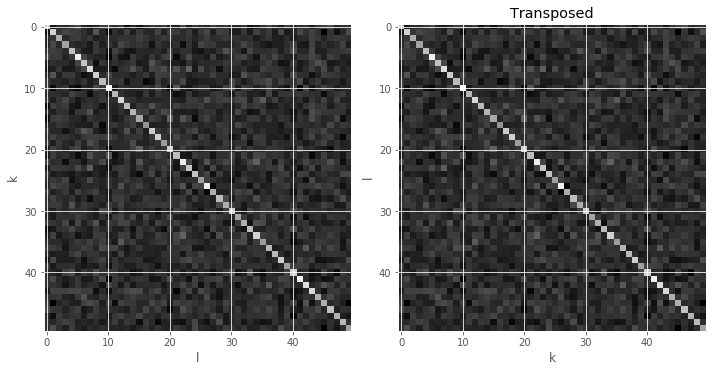

In [177]:
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(Cov_xn,cmap='gray')
ax[0].set_xlabel('l')
ax[0].set_ylabel('k')
ax[1].imshow(Cov_xn.transpose(),cmap='gray')
ax[1].set_xlabel('k')
ax[1].set_ylabel('l')
ax[1].set_title('Transposed')
fig.tight_layout()

The diagonal values represents the variance of a random variable $C_x(k,k)$<br> **Let us see the covariance of two correlated process in the cell below**

In [266]:
m = 100
N = 50
xn = np.random.normal(loc=0,scale=1,size=(N,m))
b, a = sig.butter(3, 0.5)
yn = sig.lfilter(b,a,xn,axis=0)
Cov = np.cov(xn,yn)

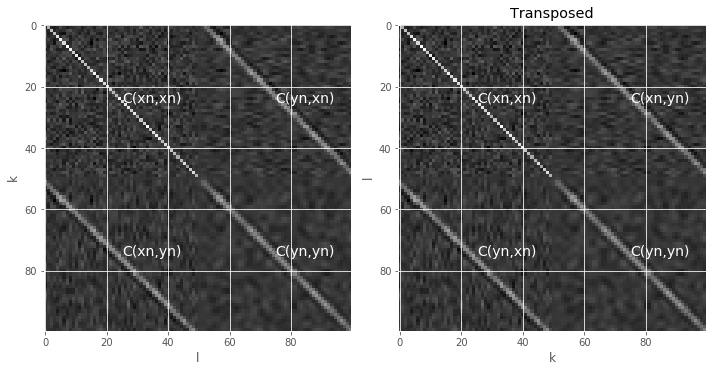

In [267]:
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(Cov,cmap='gray')
ax[0].set_xlabel('l')
ax[0].set_ylabel('k')
ax[1].imshow(Cov.transpose(),cmap='gray')
ax[1].set_xlabel('k')
ax[1].set_ylabel('l')
ax[1].set_title('Transposed')
ax[0].text(25,25,'C(xn,xn)',fontsize=14,color='white')
ax[0].text(25,75,'C(xn,yn)',fontsize=14,color='white')
ax[0].text(75,25,'C(yn,xn)',fontsize=14,color='white')
ax[0].text(75,75,'C(yn,yn)',fontsize=14,color='white')
ax[1].text(25,25,'C(xn,xn)',fontsize=14,color='white')
ax[1].text(25,75,'C(yn,xn)',fontsize=14,color='white')
ax[1].text(75,25,'C(xn,yn)',fontsize=14,color='white')
ax[1].text(75,75,'C(yn,yn)',fontsize=14,color='white')
fig.tight_layout()

Finally, It will  also be useful to display the filtered random process.

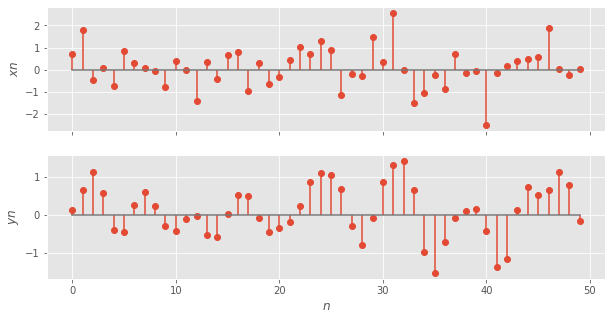

In [269]:
fig,ax = plt.subplots(2,1,figsize=(10,5),sharex=True)
ax[0].stem(xn[:,1],use_line_collection=True)
ax[1].stem(yn[:,1],use_line_collection=True)
ax[1].set_xlabel(r'$n$')
ax[0].set_ylabel(r'$xn$')
ax[1].set_ylabel(r'$yn$')
plt.show()